In [ ]:
from keras . datasets import cifar10

# Load the CIFAR -10 dataset
( train_images , train_labels ) , ( test_images ,test_labels ) = cifar10 . load_data ()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
import matplotlib . pyplot as plt
import numpy as np
from  sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras . utils import to_categorical

# concatenate all the images into a single array
images = np . concatenate (( train_images , test_images ), axis =0)
labels = np . concatenate (( train_labels , test_labels ), axis =0)

# random shullfe the images and labels
indices = np . random . permutation ( len ( images ))
images = images [ indices ]
labels = labels [ indices ]

#split data into training ,validation and test sets
train_images , test_images , train_labels , test_labels = train_test_split ( images , labels , test_size =0.2)
train_images , valid_images , train_labels , valid_labels = train_test_split( train_images , train_labels , test_size =0.25)

# convert to numpy arrays
train_images = np . array ( train_images )
test_images = np . array ( test_images )
valid_images = np . array ( valid_images )
train_labels = np . array ( train_labels )
test_labels = np . array ( test_labels )
valid_labels = np . array ( valid_labels )

# normalize the images
train_images = train_images . astype ( 'float32' ) / 255
test_images = test_images . astype ( 'float32' ) / 255
valid_images = valid_images . astype ( 'float32' ) / 255


In [ ]:
# calculate the total number element for each class in the dataset
unique , counts = np . unique ( train_labels , return_counts = True )
print ( dict ( zip ( unique , counts )))

{0: 3615, 1: 3569, 2: 3600, 3: 3542, 4: 3613, 5: 3608, 6: 3629, 7: 3644, 8: 3551, 9: 3629}


In [ ]:
from keras . models import Sequential
from keras . layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout
from keras . optimizers import Adam
from keras . losses import sparse_categorical_crossentropy

# create the model
def CNNmodel(lr):
    CNN_model = Sequential ()

    # add layers

    CNN_model.add(Conv2D(filters =128 , kernel_size =(3 ,3) ,padding='same', activation = 'relu' , input_shape =(32 ,32 ,3)))
    CNN_model.add(MaxPooling2D(pool_size =(2 ,2)))
    CNN_model.add(Conv2D(filters =64 , kernel_size =(3 ,3) , padding='same',activation = 'relu'))
    CNN_model.add(MaxPooling2D(pool_size =(2 ,2)))
    CNN_model.add(Dropout(0.3))
    CNN_model.add(Conv2D(filters =32 , kernel_size =(3 ,3) ,padding='same', activation = 'relu'))
    CNN_model.add(MaxPooling2D(pool_size =(2 ,2)))
    CNN_model.add(Flatten())
    CNN_model.add(Dense(512 , activation = 'relu'))
    CNN_model.add(Dropout(0.3))
    CNN_model.add(Dense(10 , activation = 'softmax'))

    # compile the model
    CNN_model.compile(loss= sparse_categorical_crossentropy , optimizer = Adam ( learning_rate=lr) , metrics =[ 'accuracy' ])

    # train the model
    model_history=CNN_model.fit(train_images , train_labels , batch_size =512 , epochs =20 ,validation_data =( valid_images , valid_labels ))

    return CNN_model,model_history


Epoch 1/20
71/71 [==============================] - 6s 60ms/step - loss: 2.1965 - accuracy: 0.1939 - val_loss: 1.9784 - val_accuracy: 0.2822
Epoch 2/20
71/71 [==============================] - 3s 49ms/step - loss: 1.8861 - accuracy: 0.3184 - val_loss: 1.7716 - val_accuracy: 0.3664
Epoch 3/20
71/71 [==============================] - 3s 48ms/step - loss: 1.7507 - accuracy: 0.3688 - val_loss: 1.6716 - val_accuracy: 0.3988
Epoch 4/20
71/71 [==============================] - 3s 48ms/step - loss: 1.6777 - accuracy: 0.3931 - val_loss: 1.6107 - val_accuracy: 0.4128
Epoch 5/20
71/71 [==============================] - 4s 51ms/step - loss: 1.6224 - accuracy: 0.4112 - val_loss: 1.5503 - val_accuracy: 0.4346
Epoch 6/20
71/71 [==============================] - 3s 49ms/step - loss: 1.5783 - accuracy: 0.4255 - val_loss: 1.5100 - val_accuracy: 0.4458
Epoch 7/20
71/71 [==============================] - 4s 49ms/step - loss: 1.5448 - accuracy: 0.4378 - val_loss: 1.4802 - val_accuracy: 0.4583
Epoch 8/20
71

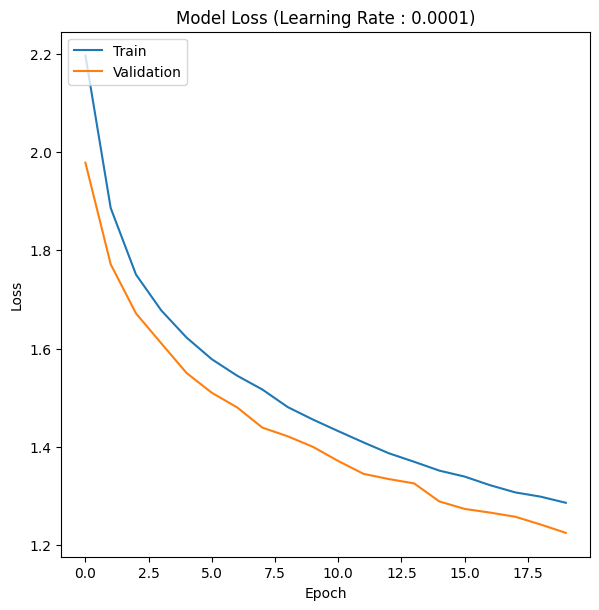

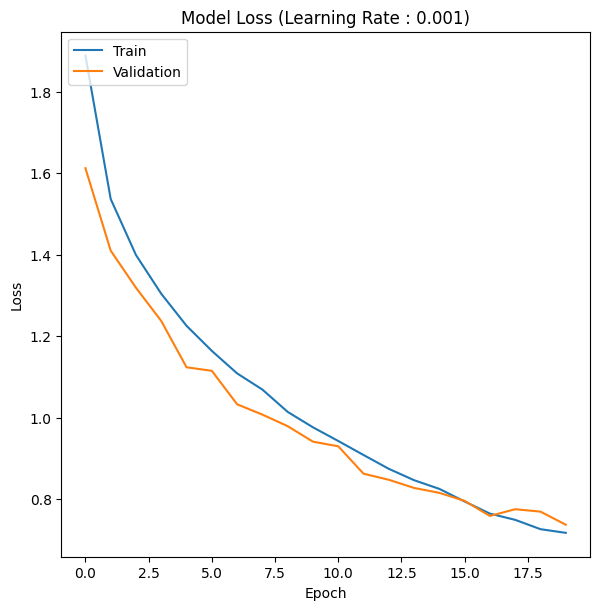

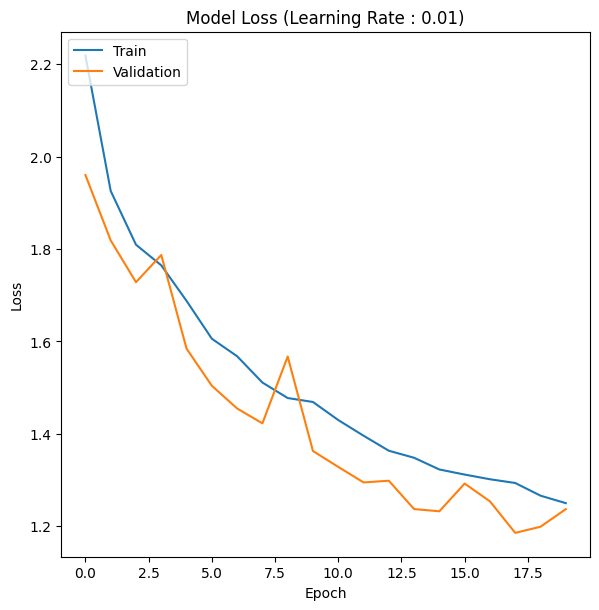

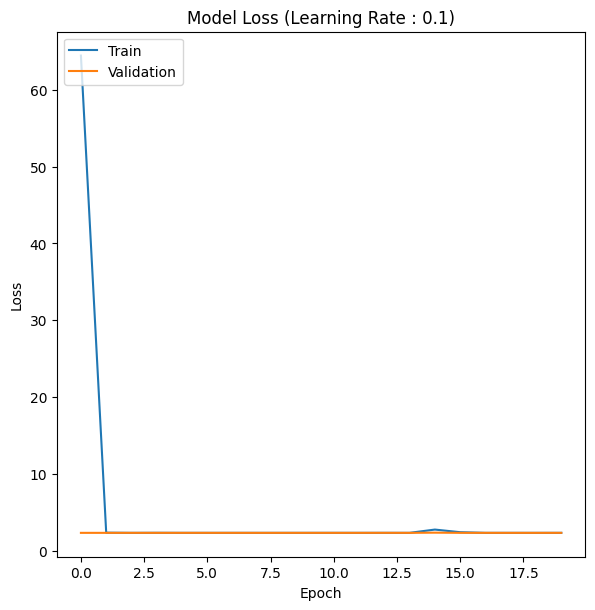

In [ ]:
# plot the loss
lr_list = [0.0001,0.001,0.01,0.1]

for i in range(len(lr_list)):
    CNN_model,model_history = CNNmodel(lr_list[i])
    plt . figure ( figsize =(15 ,15))
    plt.subplot(2,2,i+1)
    plt . plot ( model_history . history [ 'loss' ])
    plt . plot ( model_history . history [ 'val_loss' ])
    plt . title ( f'Model Loss (Learning Rate : {lr_list[i]})' )
    plt . ylabel ( 'Loss' )
    plt . xlabel ( 'Epoch' )
    plt . legend ([ 'Train' , 'Validation' ], loc = 'upper left' )
plt . show ()

Epoch 1/20
71/71 [==============================] - 7s 70ms/step - loss: 1.9112 - accuracy: 0.3019 - val_loss: 1.6196 - val_accuracy: 0.4139
Epoch 2/20
71/71 [==============================] - 4s 62ms/step - loss: 1.5618 - accuracy: 0.4291 - val_loss: 1.4266 - val_accuracy: 0.4761
Epoch 3/20
71/71 [==============================] - 4s 63ms/step - loss: 1.4110 - accuracy: 0.4844 - val_loss: 1.3303 - val_accuracy: 0.5153
Epoch 4/20
71/71 [==============================] - 4s 57ms/step - loss: 1.3087 - accuracy: 0.5274 - val_loss: 1.1918 - val_accuracy: 0.5768
Epoch 5/20
71/71 [==============================] - 4s 51ms/step - loss: 1.2290 - accuracy: 0.5586 - val_loss: 1.1113 - val_accuracy: 0.6051
Epoch 6/20
71/71 [==============================] - 4s 52ms/step - loss: 1.1634 - accuracy: 0.5836 - val_loss: 1.0831 - val_accuracy: 0.6160
Epoch 7/20
71/71 [==============================] - 4s 51ms/step - loss: 1.1042 - accuracy: 0.6076 - val_loss: 1.0266 - val_accuracy: 0.6359
Epoch 8/20
71

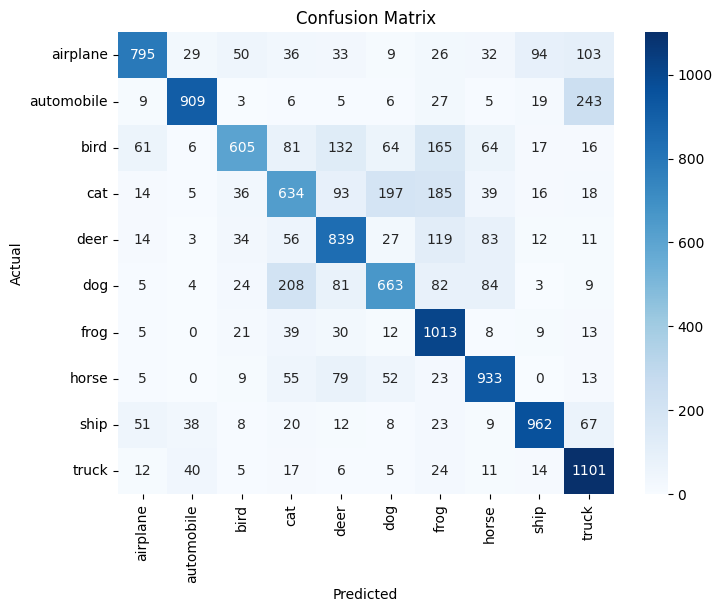

F1 score:  0.7015441936830161
Precision score:  0.7151767037355504
Recall score:  0.705250181279178


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score

CNN_model,model_history = CNNmodel(0.001)
# Predict the labels of the test set
test_predicted_labels = CNN_model.predict(test_images)

# Convert predictions classes to one hot vectors
test_predicted_labels = np.argmax(test_predicted_labels, axis=1)


conf_matrix = confusion_matrix(test_labels, test_predicted_labels)

# Plot confusion matrix using seaborn heatmap
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

# Print f1, precision, and recall scores
print("F1 score: ", f1_score(test_labels, test_predicted_labels, average='macro'))
print("Precision score: ", precision_score(test_labels, test_predicted_labels, average='macro'))
print("Recall score: ", recall_score(test_labels, test_predicted_labels, average='macro'))